# Classification with Support Vector Machines

### Imports

In [145]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Load Data

In [146]:
df = pd.read_csv('../../data/00-raw-data/wiki-crawl-results.csv')

### Re-format data

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

index = 0 : label = Women's rights
index = 1 : label = Men's rights


### Vectorize

In [148]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001,max_features=10000,stop_words="english")   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)
vocab0 = vectorizer.vocabulary_

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)

(420, 9792) (420,) (420,)


In [149]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [150]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(X)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   9683  7785  8498  5319  5824  6209  9284  3739  2553  4033  ...  4355  \
0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
4   1.0   1.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0  ...   0.0   

   4351  4350  4349  4346  4341  4335  4332  4331  9791  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 9792 columns]


In [151]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[9683])
print(vocab2[1],vocab1[7785])



woman woman
right right


In [152]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  9782  \
0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
4   1.0   1.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0  ...   0.0   

   9783  9784  9785  9786  9787  9788  9789  9790  9791  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 9792 columns]
0       367.0
1       235.0
2       202.0
3       194.0
4       177.0
        ...  
9787      1.0
9788      1.0
9789      1.0
9790      1.0
9791      1.0
Length: 9792, dt

In [153]:
# DOUBLE CHECK 
print(x.shape,y1.shape)

(420, 9792) (420,)


In [154]:
np.unique(y1, return_counts=True)

(array([0, 1]), array([291, 129], dtype=int64))

### Baseline: Random Classifier

In [155]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(y1)


-----RANDOM CLASSIFIER-----
count of prediction: dict_values([201, 219])
probability of prediction: [0.47857143 0.52142857]
accuracy 0.4523809523809524
precision, recall, fscore, (array([0.63926941, 0.24875622]), array([0.48109966, 0.3875969 ]), array([0.54901961, 0.3030303 ]), array([291, 129], dtype=int64))


### Feature Selection

In [156]:
import random
N=X.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[304, 378, 166, 89, 16, 364, 303, 146, 162, 79]
[383, 214, 284, 102, 411, 226, 6, 316, 322, 274]


In [157]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [158]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

def train_SVC_model(X,Y,kernel='linear',i_print=False):

    if(i_print):
        print(X.shape,Y.shape)
        print(type(X),type(Y))

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = SVC(kernel=kernel)

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)

In [159]:
# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_SVC_model(xtmp,y1,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

In [160]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results():

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.show();

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.show();

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.show();

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.show();

(420, 9792) (420,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
98.21428571428571 88.09523809523809 2.453125 2.640625
5 50 50 86.01190476190477 77.38095238095238
10 100 100 93.45238095238095 79.76190476190477
15 150 150 97.61904761904762 77.38095238095238
20 200 200 98.21428571428571 77.38095238095238
25 250 250 98.21428571428571 84.52380952380952
30 300 300 98.21428571428571 83.33333333333334
35 350 350 98.21428571428571 80.95238095238095
40 400 400 98.21428571428571 79.76190476190477
45 450 450 98.21428571428571 80.95238095238095
50 500 500 98.21428571428571 85.71428571428571
55 550 550 98.21428571428571 84.52380952380952
60 600 600 98.21428571428571 85.71428571428571
65 650 650 98.21428571428571 83.33333333333334
70 700 700 98.21428571428571 85.71428571428571
75 750 750 98.21428571428571 85.71428571428571
80 800 800 98.21428571428571 85.71428571428571
85 850 850 98.21428571428571 85.71428571428571
90 900 900 98.21428571428571 85.71428571428571
95 950 950 98.21428571428571 86.9047

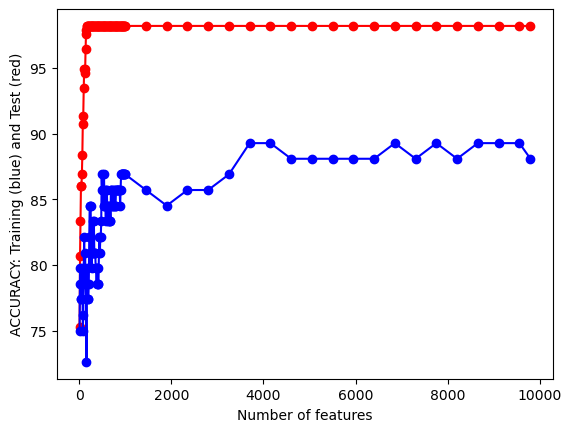

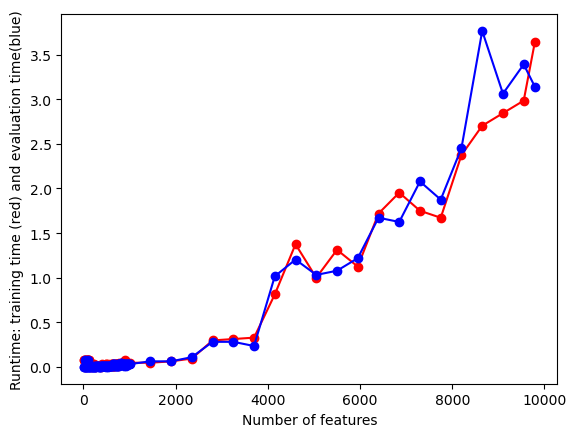

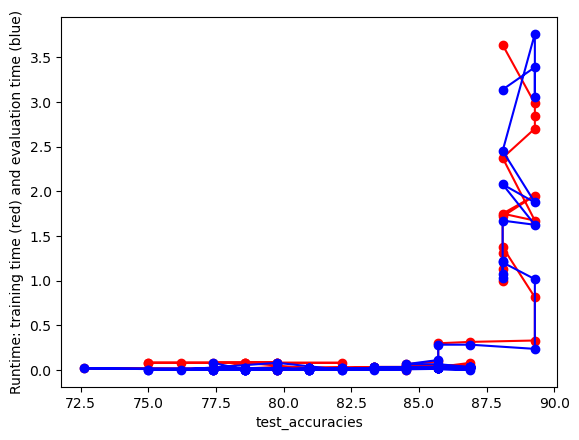

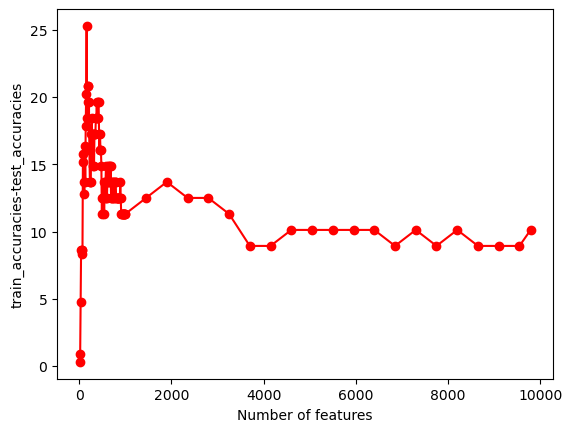

In [161]:
#linear
(acc_train,acc_test,time_train,time_eval)=train_SVC_model(x,y1,'linear',i_print=True)

initialize_arrays()

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

plot_results()

(420, 9792) (420,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
98.21428571428571 75.0 3.15625 14.65625
5 50 50 86.01190476190477 77.38095238095238
10 100 100 93.45238095238095 79.76190476190477
15 150 150 97.61904761904762 77.38095238095238
20 200 200 98.21428571428571 77.38095238095238
25 250 250 98.21428571428571 84.52380952380952
30 300 300 98.21428571428571 83.33333333333334
35 350 350 98.21428571428571 80.95238095238095
40 400 400 98.21428571428571 79.76190476190477
45 450 450 98.21428571428571 80.95238095238095
50 500 500 98.21428571428571 85.71428571428571
55 550 550 98.21428571428571 84.52380952380952
60 600 600 98.21428571428571 85.71428571428571
65 650 650 98.21428571428571 83.33333333333334
70 700 700 98.21428571428571 85.71428571428571
75 750 750 98.21428571428571 85.71428571428571
80 800 800 98.21428571428571 85.71428571428571
85 850 850 98.21428571428571 85.71428571428571
90 900 900 98.21428571428571 85.71428571428571
95 950 950 98.21428571428571 86.90476190476191
100

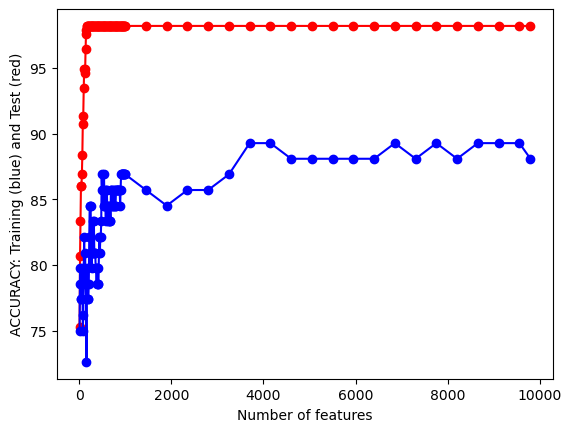

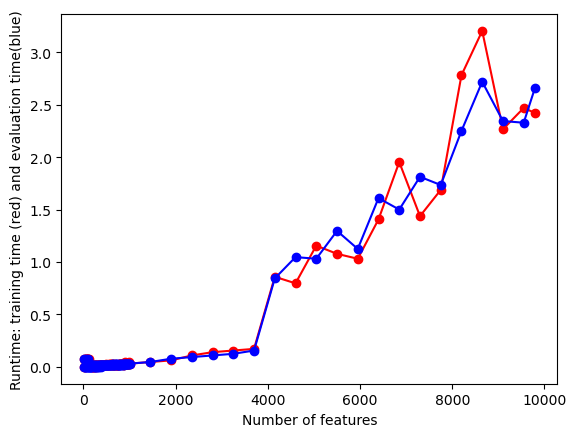

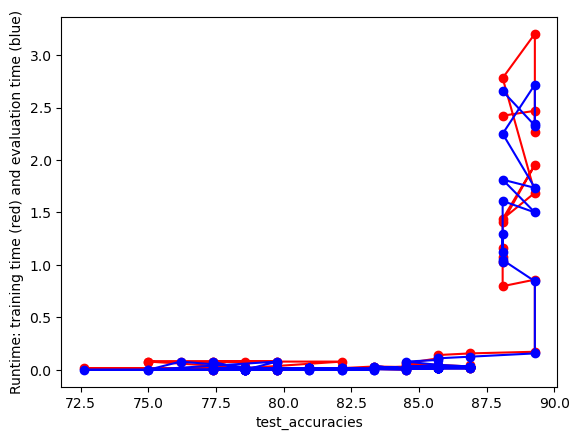

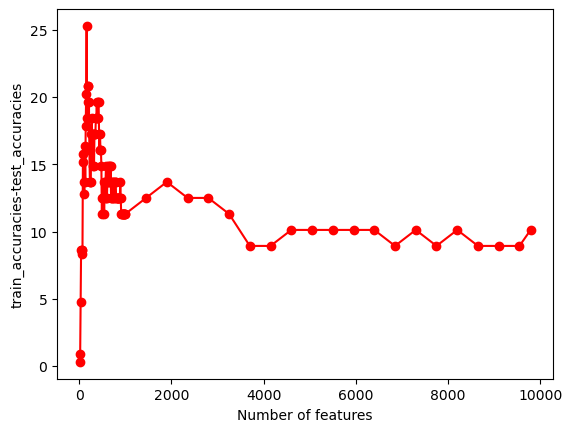

In [162]:
#gaussian
(acc_train,acc_test,time_train,time_eval)=train_SVC_model(x,y1,'rbf',i_print=True)

initialize_arrays()

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

plot_results()

(420, 9792) (420,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
96.42857142857143 85.71428571428571 1.984375 2.34375
5 50 50 86.01190476190477 77.38095238095238
10 100 100 93.45238095238095 79.76190476190477
15 150 150 97.61904761904762 77.38095238095238
20 200 200 98.21428571428571 77.38095238095238
25 250 250 98.21428571428571 84.52380952380952
30 300 300 98.21428571428571 83.33333333333334
35 350 350 98.21428571428571 80.95238095238095
40 400 400 98.21428571428571 79.76190476190477
45 450 450 98.21428571428571 80.95238095238095
50 500 500 98.21428571428571 85.71428571428571
55 550 550 98.21428571428571 84.52380952380952
60 600 600 98.21428571428571 85.71428571428571
65 650 650 98.21428571428571 83.33333333333334
70 700 700 98.21428571428571 85.71428571428571
75 750 750 98.21428571428571 85.71428571428571
80 800 800 98.21428571428571 85.71428571428571
85 850 850 98.21428571428571 85.71428571428571
90 900 900 98.21428571428571 85.71428571428571
95 950 950 98.21428571428571 86.90476

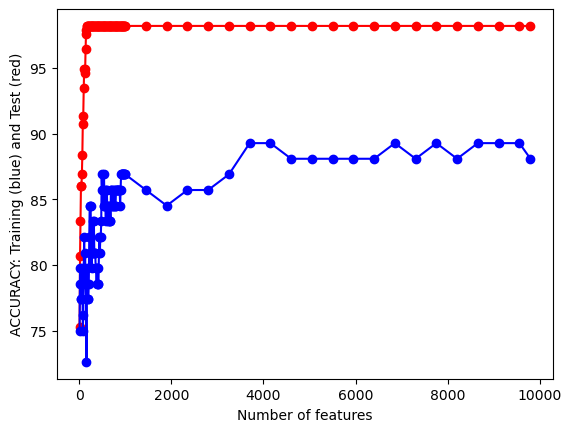

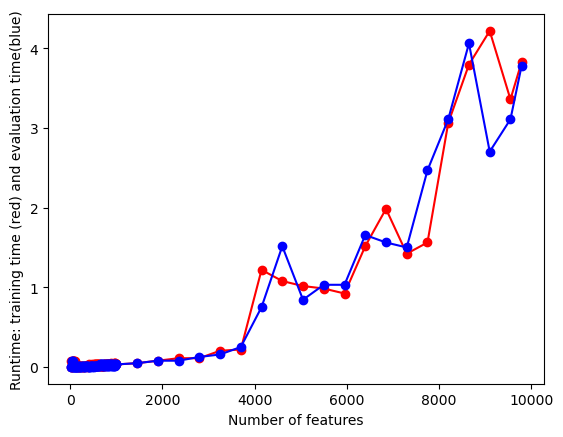

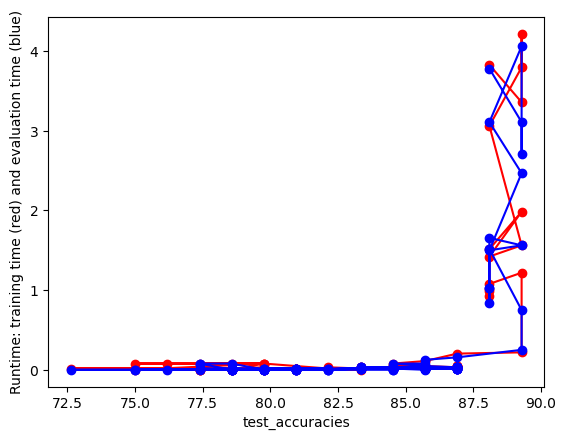

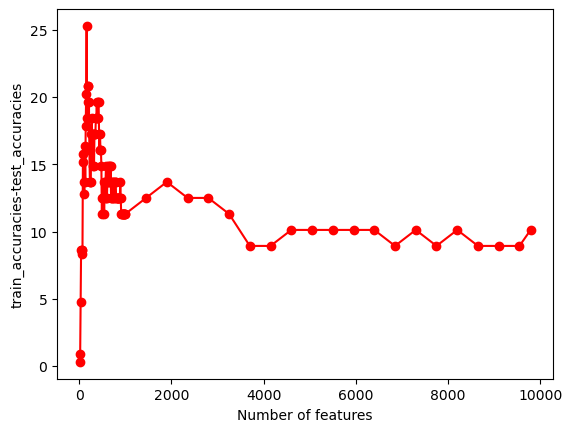

In [163]:
#sigmoid
(acc_train,acc_test,time_train,time_eval)=train_SVC_model(x,y1,'sigmoid',i_print=True)

initialize_arrays()

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

plot_results()

(420, 9792) (420,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
86.90476190476191 69.04761904761905 4.4375 7.265625
5 50 50 86.01190476190477 77.38095238095238
10 100 100 93.45238095238095 79.76190476190477
15 150 150 97.61904761904762 77.38095238095238
20 200 200 98.21428571428571 77.38095238095238
25 250 250 98.21428571428571 84.52380952380952
30 300 300 98.21428571428571 83.33333333333334
35 350 350 98.21428571428571 80.95238095238095
40 400 400 98.21428571428571 79.76190476190477
45 450 450 98.21428571428571 80.95238095238095
50 500 500 98.21428571428571 85.71428571428571
55 550 550 98.21428571428571 84.52380952380952
60 600 600 98.21428571428571 85.71428571428571
65 650 650 98.21428571428571 83.33333333333334
70 700 700 98.21428571428571 85.71428571428571
75 750 750 98.21428571428571 85.71428571428571
80 800 800 98.21428571428571 85.71428571428571
85 850 850 98.21428571428571 85.71428571428571
90 900 900 98.21428571428571 85.71428571428571
95 950 950 98.21428571428571 86.904761

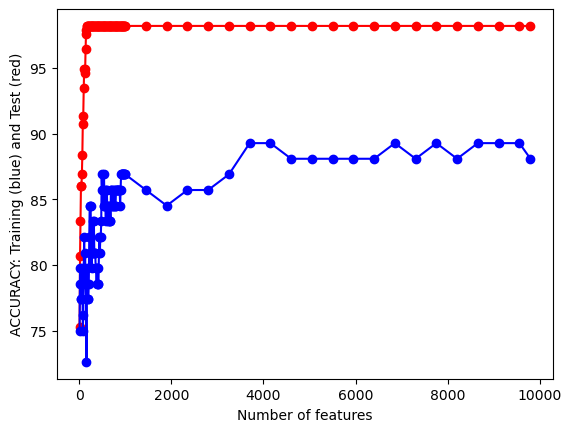

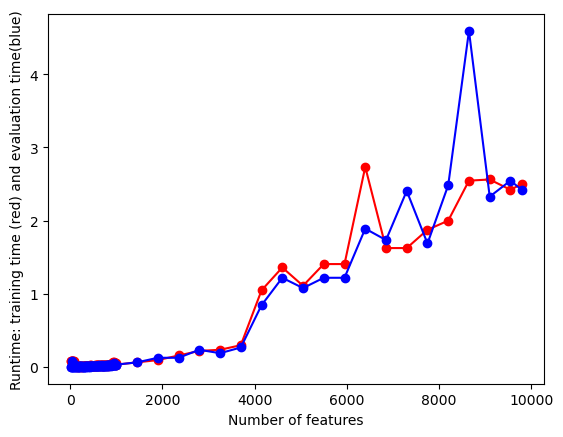

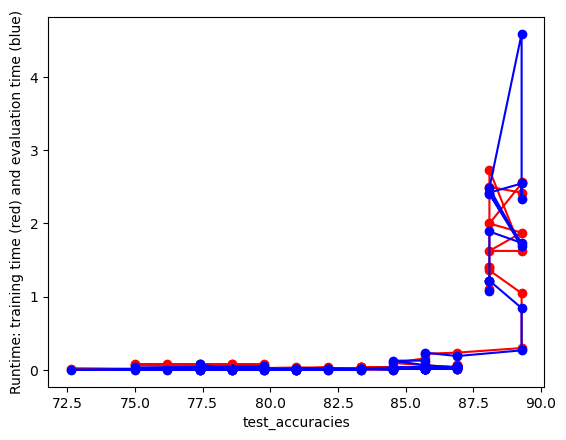

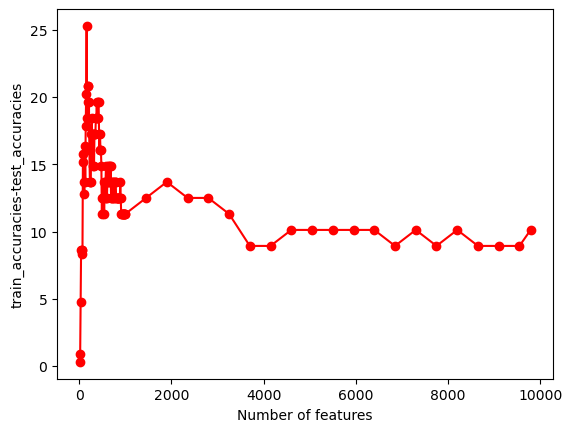

In [164]:
#polynomial
(acc_train,acc_test,time_train,time_eval)=train_SVC_model(x,y1,'poly',i_print=True)

initialize_arrays()

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

plot_results()

### Split Data

In [203]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X[:, :3000], y1, test_size=test_ratio, random_state=0, stratify=y1)
y_train=y_train.flatten()
y_test=y_test.flatten()

In [204]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (336, 3000)
<class 'numpy.ndarray'> (336,)
<class 'numpy.ndarray'> (84, 3000)
<class 'numpy.ndarray'> (84,)


In [205]:
accuracy_training_l = []
accuracy_test_l =  []

### Train Linear Kernel

In [206]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model = model.fit(x_train, y_train)

### Check the Results

In [207]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

In [208]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING (Linear)------
ACCURACY: 0.9732142857142857
RECALL: 0.9732142857142857
PRECISION: 0.9746372543385817


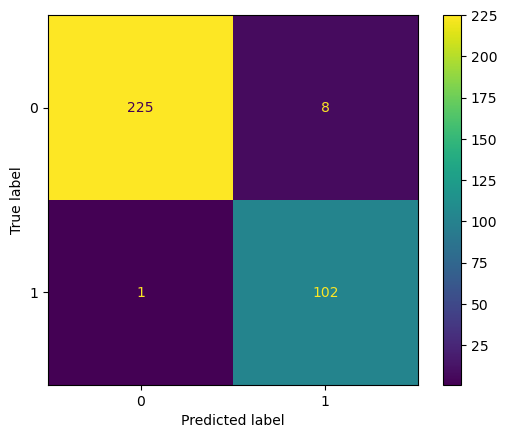

------TEST (Linear)------
ACCURACY: 0.6904761904761905
RECALL: 0.6904761904761905
PRECISION: 0.6726190476190477


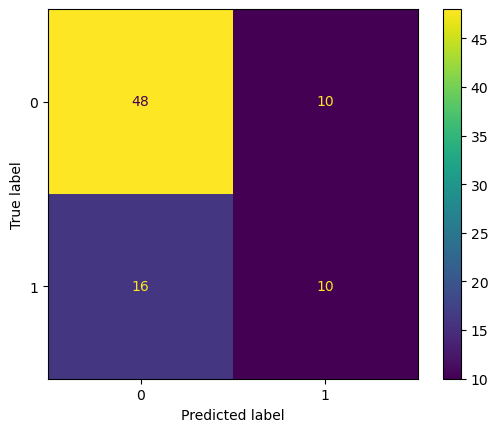

In [209]:
print("------TRAINING (Linear)------")
confusion_plot(y_train,yp_train)
print("------TEST (Linear)------")
confusion_plot(y_test,yp_test)

### Train Gaussian Kernel

In [210]:
model = SVC(kernel='rbf')
model = model.fit(x_train, y_train)

### Check the Results

In [211]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Gaussian)------
ACCURACY: 0.9672619047619048
RECALL: 0.9672619047619048
PRECISION: 0.9676962479003086


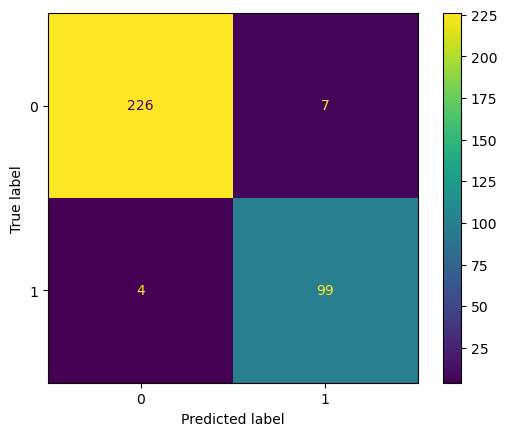

------TEST (Gaussian)------
ACCURACY: 0.6904761904761905
RECALL: 0.6904761904761905
PRECISION: 0.6347270615563299


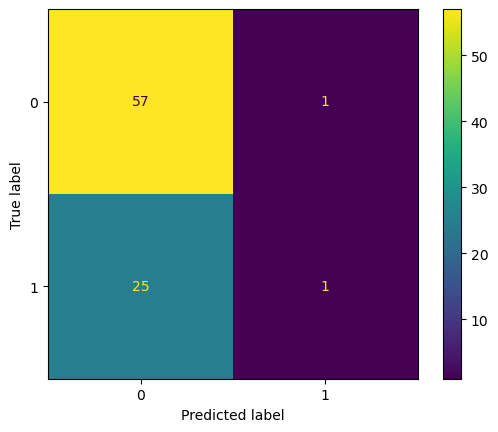

In [212]:
print("------TRAINING (Gaussian)------")
confusion_plot(y_train,yp_train)
print("------TEST (Gaussian)------")
confusion_plot(y_test,yp_test)

### Train Sigmoid Kernel

In [213]:
model = SVC(kernel='sigmoid')
model = model.fit(x_train, y_train)

### Check the Results

In [214]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.8601190476190477
RECALL: 0.8601190476190477
PRECISION: 0.8799707770729229


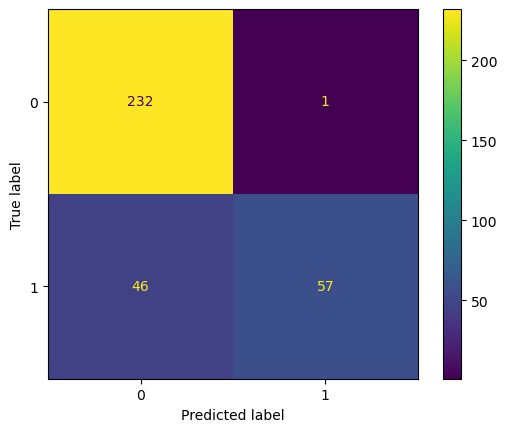

------TEST (Sigmoid)------
ACCURACY: 0.7142857142857143
RECALL: 0.7142857142857143
PRECISION: 0.6931390977443609


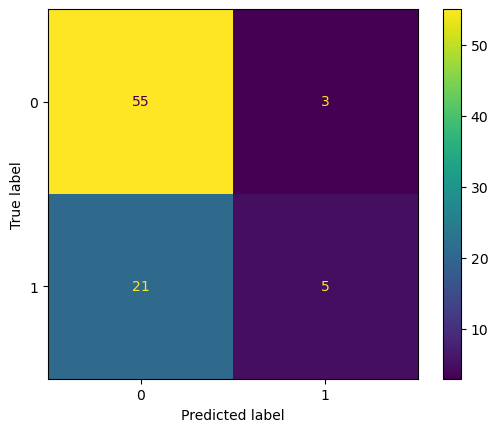

In [215]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Polynomial Kernel Hyperparameter Tuning

degree :  training acc , test acc
1 :  0.9494047619047619 , 0.7380952380952381
degree :  training acc , test acc
2 :  0.8660714285714286 , 0.6904761904761905
degree :  training acc , test acc
3 :  0.8392857142857143 , 0.6904761904761905
degree :  training acc , test acc
4 :  0.8303571428571429 , 0.6904761904761905
degree :  training acc , test acc
5 :  0.8184523809523809 , 0.6904761904761905
degree :  training acc , test acc
6 :  0.8184523809523809 , 0.6904761904761905
degree :  training acc , test acc
7 :  0.8184523809523809 , 0.6904761904761905
degree :  training acc , test acc
8 :  0.8184523809523809 , 0.6904761904761905
degree :  training acc , test acc
9 :  0.8095238095238095 , 0.6904761904761905
degree :  training acc , test acc
10 :  0.8095238095238095 , 0.6904761904761905


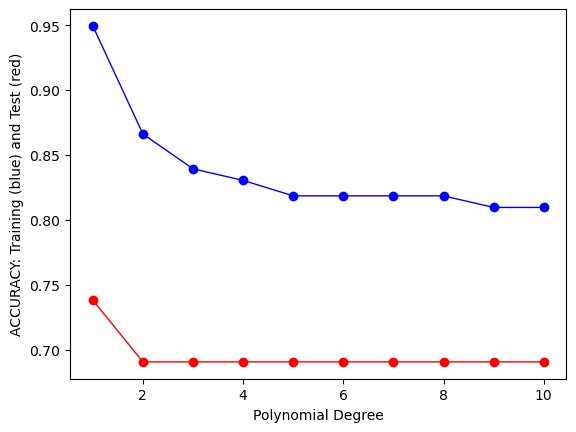

In [216]:
accuracies_train = []
accuracies_test = []
numbers = range(1, 11)

for i in numbers:
    model = SVC(kernel='poly', degree = i)
    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    
    cm_train = confusion_matrix(y_train, yp_train)
    ac_train = accuracy_score(y_train, yp_train)
    
    cm_test = confusion_matrix(y_test, yp_test)
    ac_test = accuracy_score(y_test, yp_test)
    
    print('degree', ': ', 'training acc' , ',', 'test acc')
    print(i, ": ", ac_train, ',', ac_test)
    
    accuracies_train.append(ac_train)
    accuracies_test.append(ac_test)
    
plt.plot(numbers, accuracies_train, linewidth=1, color='b')
plt.scatter(numbers, accuracies_train, c='b')
plt.plot(numbers, accuracies_test, linewidth=1, color='r')
plt.scatter(numbers, accuracies_test, c='r')
plt.xlabel("Polynomial Degree")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.style.use('fivethirtyeight')
plt.show();

plt.style.use('default')

### Train Polynomial Kernel

In [217]:
model = SVC(kernel = 'poly', degree = 1)
model = model.fit(x_train, y_train)

### Check the Results

In [218]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Polynomial; degree=1)------
ACCURACY: 0.9494047619047619
RECALL: 0.9494047619047619
PRECISION: 0.949361359126984


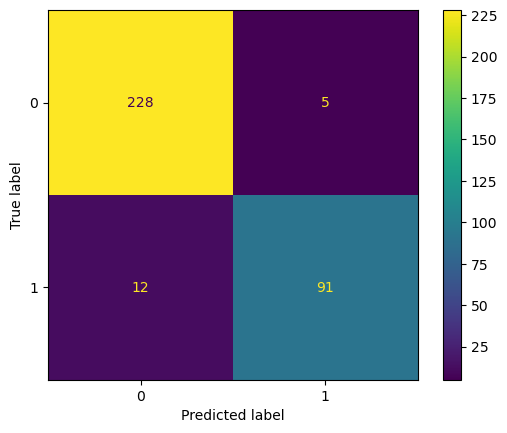

------TEST (Polynomial; degree=1)------
ACCURACY: 0.7380952380952381
RECALL: 0.7380952380952381
PRECISION: 0.7298584298584297


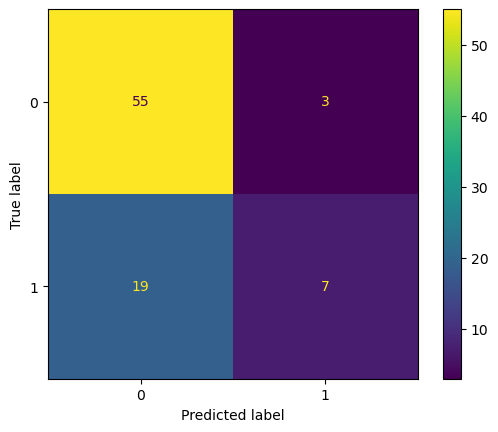

In [219]:
print("------TRAINING (Polynomial; degree=1)------")
confusion_plot(y_train,yp_train)
print("------TEST (Polynomial; degree=1)------")
confusion_plot(y_test,yp_test)

### Comparing Models

In [182]:
kernel_types = ['Linear', 'Gaussian', 'Sigmoid', 'Polynomial']

d = {"Kernels": kernel_types, "Training Accuracy": accuracy_training_l, "Test Accuracy": accuracy_test_l}
df = pd.DataFrame(d)
df = df.sort_values(by=["Test Accuracy"], ascending=False)

[Text(0, 0, 'Linear'),
 Text(1, 0, 'Polynomial'),
 Text(2, 0, 'Sigmoid'),
 Text(3, 0, 'Gaussian')]

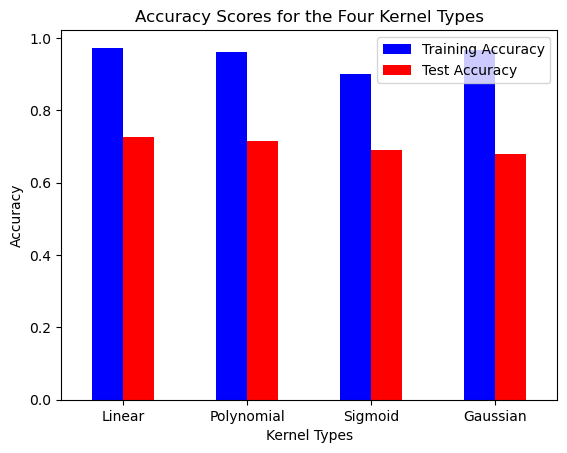

In [183]:
ax = df.plot(kind='bar', color=['b', 'r'])
plt.ylabel('Accuracy')
plt.xlabel('Kernel Types')
plt.title('Accuracy Scores for the Four Kernel Types')
plt.xticks(rotation = 0)
ax.set_xticklabels(df['Kernels'])

In [198]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [2**-7, 2**-6, 2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 1, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7], 
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                               0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128],
                         'kernel': ['linear']})

In [199]:
from sklearn.metrics import classification_report

# print best parameter after tuning
print(grid.best_params_)

{'C': 0.0625, 'kernel': 'linear'}


### Train Optimal Model

In [201]:
model = SVC(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'])
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

------TRAINING------
ACCURACY: 0.9702380952380952
RECALL: 0.9702380952380952
PRECISION: 0.972062777062777


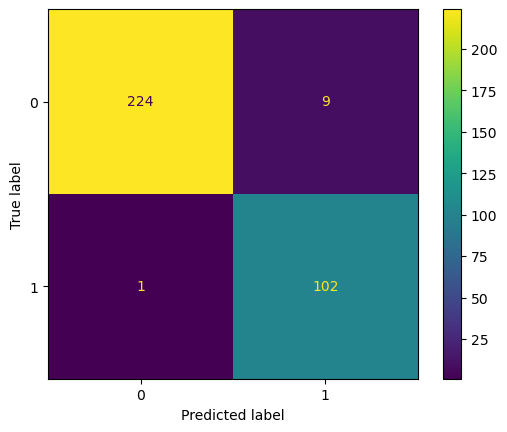

------TEST------
ACCURACY: 0.6904761904761905
RECALL: 0.6904761904761905
PRECISION: 0.6781874039938556


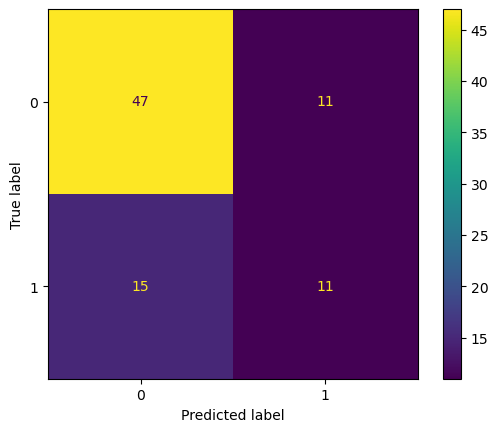

In [202]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)